In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Extract the Activities log section
with open("./89779400-d017-4487-99bd-02d7e72091e1_final.log", "r") as f:
    lines = f.readlines()
#     print(lines)

# Step 2: Isolate the "Activities log" block
in_activities = False
activities_lines = []

for line in lines:
    if line.strip() == "Activities log:":
        in_activities = True
        continue
    if in_activities:
        if line.strip() == "" or line.endswith("log:\n"):  # new section or empty
            break
        activities_lines.append(line.strip())

# Step 3: Save the extracted log to a temporary file (optional, for clarity)
with open("activities_temp.log", "w") as f:
    for line in activities_lines:
        f.write(line + "\n")

# Step 4: Convert to CSV using pandas
df = pd.read_csv("activities_temp.log", sep=";", engine="python")
df.to_csv("activities_log.csv", index=False)

In [2]:
pnl = df.groupby(['timestamp', 'product'])['profit_and_loss'].sum().unstack(fill_value=0)
pnl

product,CROISSANTS,DJEMBES,JAMS,KELP,PICNIC_BASKET1,PICNIC_BASKET2,RAINFOREST_RESIN,SQUID_INK,VOLCANIC_ROCK,VOLCANIC_ROCK_VOUCHER_10000,VOLCANIC_ROCK_VOUCHER_10250,VOLCANIC_ROCK_VOUCHER_10500,VOLCANIC_ROCK_VOUCHER_9500,VOLCANIC_ROCK_VOUCHER_9750
timestamp,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.000000,0.00,0.000,0.0,0.0,0.00,0.000000,0.000000,0.0,0.000000,0.000000
100,0.0,0.0,0.0,0.000000,0.00,0.000,0.0,0.0,0.00,0.000000,0.000000,0.0,0.000000,0.000000
200,0.0,0.0,0.0,5.064453,0.00,0.000,0.0,0.0,0.00,0.000000,0.000000,0.0,0.000000,0.000000
300,0.0,0.0,0.0,3.476562,0.00,0.000,0.0,0.0,0.00,0.000000,0.000000,0.0,0.000000,0.000000
400,0.0,0.0,0.0,4.212891,0.00,0.000,0.0,0.0,0.00,0.000000,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999500,0.0,0.0,0.0,4680.250000,19647.50,-2967.750,25651.0,0.0,-73146.25,53102.082031,-17796.720703,-5084.0,-19354.130859,-4180.375000
999600,0.0,0.0,0.0,4677.585938,19579.00,-3117.000,25651.0,0.0,-72797.75,52570.300781,-17803.880859,-5084.0,-19385.019531,-4157.416016
999700,0.0,0.0,0.0,4678.031250,19384.00,-3047.125,25651.0,0.0,-72574.25,53149.164062,-17806.779297,-5084.0,-19426.542969,-4170.120117


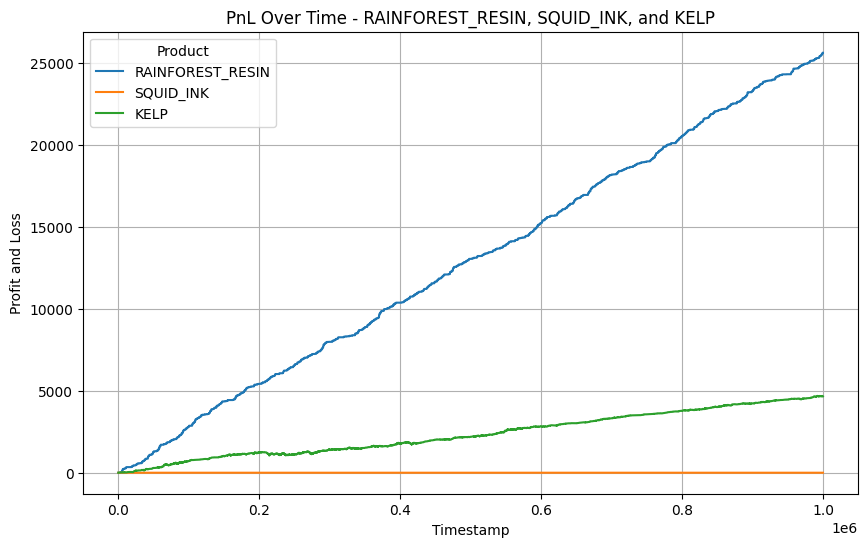

In [3]:
products = ['RAINFOREST_RESIN', 'SQUID_INK', 'KELP']
pnl[products].plot(figsize=(10, 6))  # you can tweak figsize as you like

plt.title("PnL Over Time - RAINFOREST_RESIN, SQUID_INK, and KELP")
plt.xlabel("Timestamp")
plt.ylabel("Profit and Loss")
plt.legend(title="Product")
plt.grid(True)
plt.show()

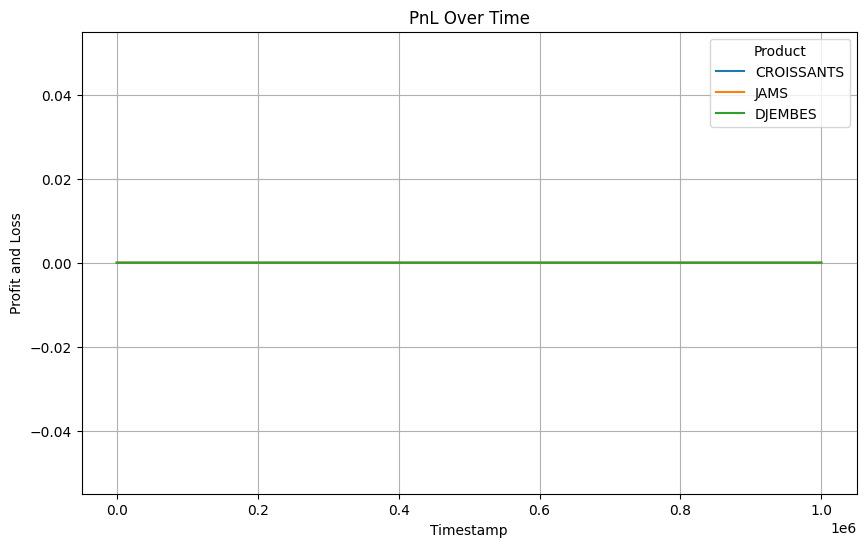

In [4]:
products = ['CROISSANTS', 'JAMS', 'DJEMBES']
pnl[products].plot(figsize=(10, 6))  # you can tweak figsize as you like

plt.title("PnL Over Time")
plt.xlabel("Timestamp")
plt.ylabel("Profit and Loss")
plt.legend(title="Product")
plt.grid(True)
plt.show()

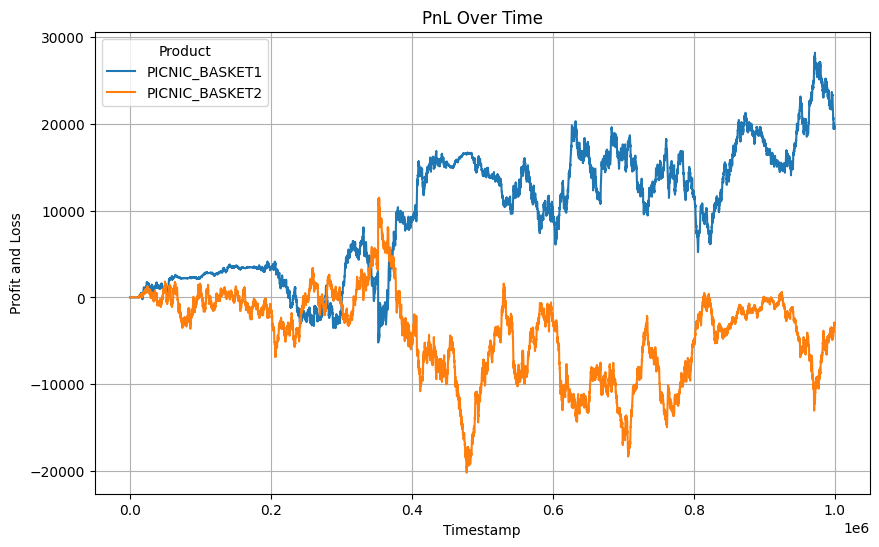

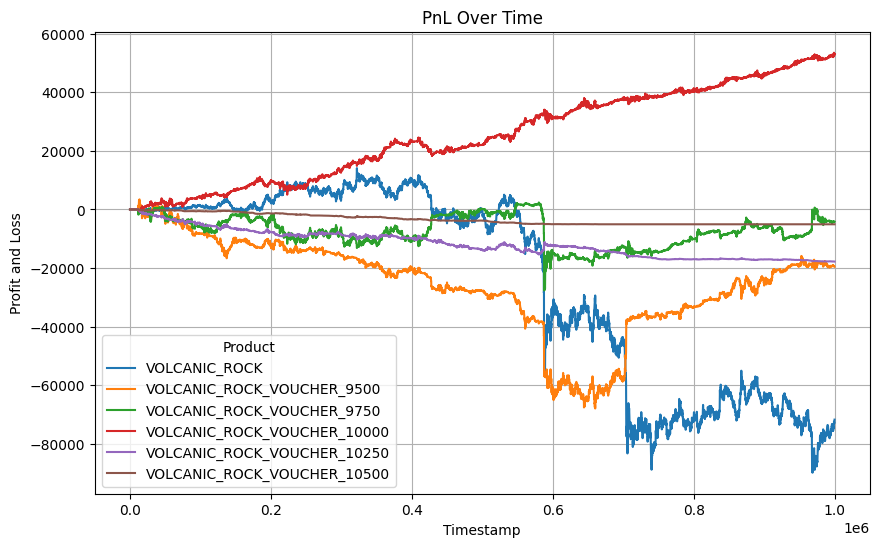

In [5]:
products = ['PICNIC_BASKET1','PICNIC_BASKET2']
pnl[products].plot(figsize=(10, 6))  # you can tweak figsize as you like

plt.title("PnL Over Time")
plt.xlabel("Timestamp")
plt.ylabel("Profit and Loss")
plt.legend(title="Product")
plt.grid(True)
plt.show()


# In[8]:


products = ['VOLCANIC_ROCK','VOLCANIC_ROCK_VOUCHER_9500','VOLCANIC_ROCK_VOUCHER_9750', 'VOLCANIC_ROCK_VOUCHER_10000', 'VOLCANIC_ROCK_VOUCHER_10250', 'VOLCANIC_ROCK_VOUCHER_10500']


# In[9]:


pnl[products].plot(figsize=(10, 6))  # you can tweak figsize as you like

plt.title("PnL Over Time")
plt.xlabel("Timestamp")
plt.ylabel("Profit and Loss")
plt.legend(title="Product")
plt.grid(True)
plt.show()